# The salaries of Data Scientists The model to predict the factors influencing the salaries of Data Scientists prediction

Summary
The aim of this study is to investigate the factors influencing the salaries of Data Scientists. To achieve this, a dataset containing various relevant variables was utilized. This report describes the exploratory analysis conducted to understand the relationship between these factors and Data Scientists' salaries


## Import libraries

In [1]:
# standard library imports
import pandas as pd
import numpy as np
import sklearn
import os


#visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import fird-party libraries and modules

import datetime

import country_converter as coco
import wbdata as wb

from dotenv import load_dotenv
load_dotenv()

import json

import requests

import openpyxl

import xgboost as xgb

from sklearn.pipeline import Pipeline as skl_pipeline

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings

import optuna

from optuna.visualization.matplotlib import plot_param_importances

import mlflow

client = mlflow.MlflowClient(tracking_uri='http://127.0.0.1:8080')
mlflow.set_tracking_uri='http://127.0.0.1:8080'

import joblib


# import requests



# import json





# from sklearn.model_selection import train_test_split, GridSearchCV 

# from sklearn.pipeline import Pipeline as skl_pipeline

# # from imblearn.pipeline import Pipeline as imb_pipeline
# # from imblearn.over_sampling import SMOTE






# # load metrics

# from sklearn.metrics import PredictionErrorDisplay

# output format
pd.set_option('display.float_format', '{:.3f}'.format)
sklearn.set_config(transform_output='pandas')
warnings.filterwarnings("ignore")

# constant
RAND_ST = 345

# path to file
path_to_salary_dataset = 'data/ds_salaries.csv'
path_to_inflation_dataset = 'data/inflation_by_country.xlsx'


In [2]:
# import xmltodict
mlflow.__version__

'2.9.2'

## Load datasets

In [3]:
df_sal = pd.read_csv(path_to_salary_dataset)
inf_2023 = pd.read_excel(path_to_inflation_dataset)
df_sal.info()
df_sal.head()
inf_2023.info()
inf_2023.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_locati

,company_location,country_name,inflation
0,ARG,Argentina,161.000
1,AUS,Australia,5.400
2,AUT,Austria,5.400
3,BEL,Belgium,0.800
4,BFA,Burkina Faso,-1.600


## Datasets description

### Dataset ds_salary
To conduct this analysis, a dataset containing relevant information about Data Scientists was used. The dataset includes the following variables:

work_year:The year the salary was paid.

experience_level: The experience level in the job during the year.

EN > Entry-level / Junior
MI> Mid-level / Intermediate
SE > Senior-level / Expert
EX > Executive-level / Director

employment_type: The type of employment for the role.

PT > Part-time
FT > Full-time
CT > Contract
FL > Freelance
job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salaryinusd: The salary in USD.

employee_residence: Employee's primary country of residence during the work year as an ISO 3166 country code.

remote_ratio:The overall amount of work done remotely.

company_location: The country of the employer's main office or contracting branch.

company_size: The median number of people that worked for the company during the year.  



Data Science Job Salaries Dataset contains 11 columns, each are:

- `work_year`: The year the salary was paid.
- `experience_level`: The experience level in the job during the year
- `employment_type`: The type of employment for the role
- `job_title`: The role worked in during the year.
- `salary`: The total gross salary amount paid.
- `salary_currency`: The currency of the salary paid as an ISO 4217 currency code.
- `salaryinusd`: The salary in USD
- `employee_residence`: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- `remote_ratio`: The overall amount of work done remotely
- `company_location`: The country of the employer's main office or contracting branch
- `company_size`: The median number of people that worked for the company during the year


### Dataset inflation

`inflation_year` - inflation in percents

## EDA

In [4]:
df_sal.describe() #ETL bing api course inflation graph model 

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000,3755.000,3755.000,3755.000
mean,2022.374,190695.572,137570.390,46.272
std,0.691,671676.501,63055.625,48.589
min,2020.000,6000.000,5132.000,0.000
25%,2022.000,100000.000,95000.000,0.000
50%,2022.000,138000.000,135000.000,0.000
75%,2023.000,180000.000,175000.000,100.000
max,2023.000,30400000.000,450000.000,100.000


In [5]:
df_sal['job_title'].value_counts()  

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

In [6]:
df_sal['work_year'].value_counts() #+ course + inflation by country + by world  + by us col + https://huggingface.co/WhereIsAI/UAE-Large-V1

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

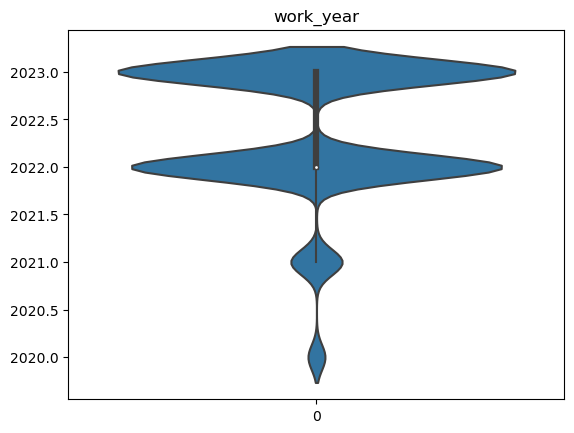

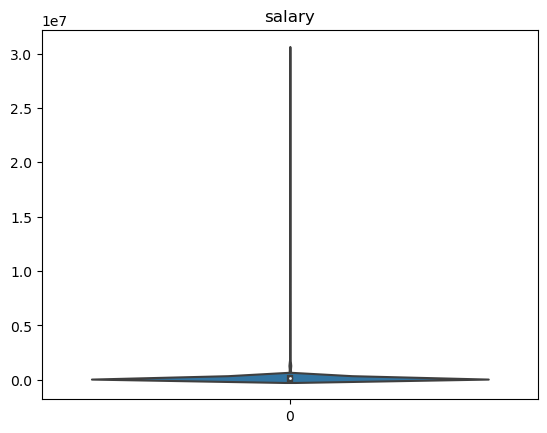

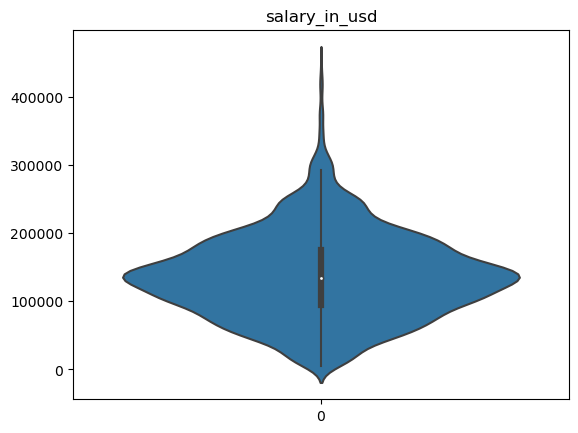

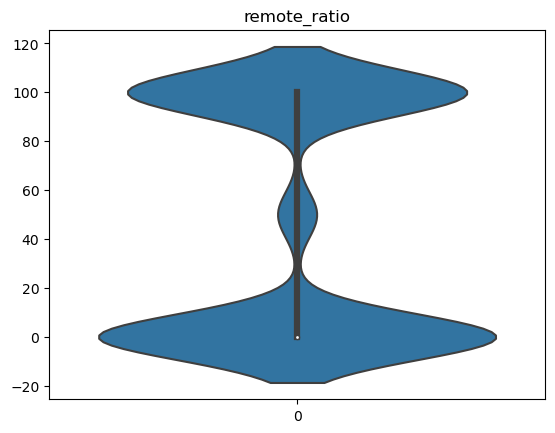

In [7]:
for col in df_sal.select_dtypes(exclude='object').columns:
    sns.violinplot(df_sal[col])
    plt.title(col)
    plt.show()

    # sns.violinplot(df[col])

In [8]:
# Dropping the 'salary' column from the dataframe
df_sal.drop('salary', axis=1, inplace=True)
df_sal.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M


### Get USD currency exchange rates

In [9]:
currency_list = ' ,'.join(df_sal['salary_currency'].unique().tolist())
currency_list

'EUR ,USD ,INR ,HKD ,CHF ,GBP ,AUD ,SGD ,CAD ,ILS ,BRL ,THB ,PLN ,HUF ,CZK ,DKK ,JPY ,MXN ,TRY ,CLP'

In [10]:
def get_exchange_rates_history(date):
    '''get rates from api'''
    api_url = f'http://api.exchangeratesapi.io/v1/{date}?access_key={os.getenv("API_KEY")}&cbase=EUR&symbols={currency_list}'
    
    try:
        response = requests.get(api_url)
        if response.status_code == 200:
            exchange_rates = pd.Series(response.json()['rates']).to_frame(name='rates').reset_index(names='currency')
            exchange_rates['date'] = int(pd.to_datetime(date).year)
            exchange_rates['usd_rate'] = (
                float(exchange_rates[exchange_rates['currency']=='USD']['rates']) / exchange_rates['rates']
                )
            
            return exchange_rates
    except requests.exceptions.RequestException as error:
        print(f"Error: {error}")
        

In [11]:
exchange_rates_2023 = get_exchange_rates_history('2023-01-01') # for every month you can code a loop
exchange_rates_2022 = get_exchange_rates_history('2022-01-01')
exchange_rates_2021 = get_exchange_rates_history('2021-01-01')
exchange_rates_2020 = get_exchange_rates_history('2020-01-01')

print(exchange_rates_2023, exchange_rates_2022, exchange_rates_2021, exchange_rates_2020)

   currency   rates  date  usd_rate
0       EUR   1.000  2023     1.070
1       USD   1.070  2023     1.000
2       INR  88.580  2023     0.012
3       HKD   8.351  2023     0.128
4       CHF   0.989  2023     1.082
5       GBP   0.885  2023     1.210
6       AUD   1.570  2023     0.682
7       SGD   1.433  2023     0.747
8       CAD   1.449  2023     0.739
9       ILS   3.776  2023     0.283
10      BRL   5.659  2023     0.189
11      THB  37.050  2023     0.029
12      PLN   4.682  2023     0.229
13      HUF 399.671  2023     0.003
14      CZK  24.111  2023     0.044
15      DKK   7.439  2023     0.144
16      JPY 140.143  2023     0.008
17      MXN  20.870  2023     0.051
18      TRY  20.008  2023     0.054
19      CLP 908.011  2023     0.001    currency   rates  date  usd_rate
0       EUR   1.000  2022     1.137
1       USD   1.137  2022     1.000
2       INR  84.733  2022     0.013
3       HKD   8.865  2022     0.128
4       CHF   1.037  2022     1.097
5       GBP   0.840  2022   

In [12]:
exchange_rates_20_23 = pd.concat([exchange_rates_2023, exchange_rates_2022, exchange_rates_2021, exchange_rates_2020], axis=0)
exchange_rates_20_23 = exchange_rates_20_23.reset_index(drop=True)
exchange_rates_20_23

,currency,rates,date,usd_rate
0,EUR,1.000,2023,1.070
1,USD,1.070,2023,1.000
2,INR,88.580,2023,0.012
3,HKD,8.351,2023,0.128
4,CHF,0.989,2023,1.082
...,...,...,...,...
75,DKK,7.471,2020,0.150
76,JPY,121.963,2020,0.009
77,MXN,21.218,2020,0.053
78,TRY,6.672,2020,0.168


In [13]:
exchange_rates_20_23 = exchange_rates_20_23.rename(columns={'currency': 'salary_currency', 'date': 'work_year'})
exchange_rates_20_23.drop('rates', axis=1, inplace=True)
exchange_rates_20_23

,salary_currency,work_year,usd_rate
0,EUR,2023,1.070
1,USD,2023,1.000
2,INR,2023,0.012
3,HKD,2023,0.128
4,CHF,2023,1.082
...,...,...,...
75,DKK,2020,0.150
76,JPY,2020,0.009
77,MXN,2020,0.053
78,TRY,2020,0.168


In [14]:
# save exchange rates to file
exchange_rates_20_23.to_csv('data/exchange_rates_20_23.csv')

### Get inflation rates

You can add cpi index from `wbdata` - World Bank Data

In [15]:
# get list of countries
df_sal['company_location'].value_counts()

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: count, Length: 72, dtype: int64

#### Convert countries from ISO2 to ISO3

In [16]:
# convert countries from ISO2 to ISO3 + country names

# cc = coco.CountryConverter()

df_sal['company_location'] = coco.convert(names=df_sal['company_location'], to='ISO3',not_found=None)
countries = list(df_sal['company_location'].unique())

df_sal['country_name'] = coco.convert(names=df_sal['company_location'], to='name',not_found=None)
df_sal.head()


,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,country_name
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ESP,L,Spain
1,2023,MI,CT,ML Engineer,USD,30000,US,100,USA,S,United States
2,2023,MI,CT,ML Engineer,USD,25500,US,100,USA,S,United States
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CAN,M,Canada
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CAN,M,Canada


#### Get inflation rates from world bank

In [17]:
countries = list(df_sal['company_location'].unique())
inf_rates = wb.get_series('FP.CPI.TOTL.ZG', country=countries, column_name='inflation')
inf_rates = pd.DataFrame(inf_rates).reset_index()
inf_rates

,country,date,inflation
0,Albania,2022,6.725
1,Albania,2021,2.041
2,Albania,2020,1.621
3,Albania,2019,1.411
4,Albania,2018,2.028
...,...,...,...
4531,Viet Nam,1964,NaN
4532,Viet Nam,1963,NaN
4533,Viet Nam,1962,NaN
4534,Viet Nam,1961,NaN


In [18]:
inf_rates.columns = ['country_name', 'work_year', 'inflation']
inf_rates

,country_name,work_year,inflation
0,Albania,2022,6.725
1,Albania,2021,2.041
2,Albania,2020,1.621
3,Albania,2019,1.411
4,Albania,2018,2.028
...,...,...,...
4531,Viet Nam,1964,NaN
4532,Viet Nam,1963,NaN
4533,Viet Nam,1962,NaN
4534,Viet Nam,1961,NaN


In [19]:
inf_rates.dtypes

country_name     object
work_year        object
inflation       float64
dtype: object

In [20]:
inf_rates['work_year'] = inf_rates['work_year'].astype('int')
inf_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4536 entries, 0 to 4535
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  4536 non-null   object 
 1   work_year     4536 non-null   int64  
 2   inflation     3607 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 106.4+ KB


In [21]:
inf_rates['work_year'].value_counts()

work_year
2022    72
1975    72
1988    72
1987    72
1986    72
        ..
1996    72
1995    72
1994    72
1993    72
1960    72
Name: count, Length: 63, dtype: int64

In [22]:
temp_inf = inf_rates.copy()

In [23]:
inf_rates = inf_rates.drop(inf_rates[inf_rates['work_year']<2020].index, axis=0)
inf_rates

,country_name,work_year,inflation
0,Albania,2022,6.725
1,Albania,2021,2.041
2,Albania,2020,1.621
63,United Arab Emirates,2022,4.828
64,United Arab Emirates,2021,-0.014
...,...,...,...
4411,United States,2021,4.698
4412,United States,2020,1.234
4473,Viet Nam,2022,3.157
4474,Viet Nam,2021,1.835


In [24]:
inf_rates.isna().sum()

country_name     0
work_year        0
inflation       13
dtype: int64

In [25]:
temp_inf = inf_rates.copy()

In [26]:
# get same country_name for all dfs
inf_rates['company_location'] = coco.convert(names=inf_rates['country_name'], to='ISO3', not_found=None)

inf_rates['country_name'] = coco.convert(names=inf_rates['company_location'], to='name', not_found=None)
inf_rates


,country_name,work_year,inflation,company_location
0,Albania,2022,6.725,ALB
1,Albania,2021,2.041,ALB
2,Albania,2020,1.621,ALB
63,United Arab Emirates,2022,4.828,ARE
64,United Arab Emirates,2021,-0.014,ARE
...,...,...,...,...
4411,United States,2021,4.698,USA
4412,United States,2020,1.234,USA
4473,Vietnam,2022,3.157,VNM
4474,Vietnam,2021,1.835,VNM


In [27]:
# Filter rows where 'inflation' is NaN
inf_rates[inf_rates['inflation'].isna()]

,country_name,work_year,inflation,company_location
126,Argentina,2022,NaN,ARG
127,Argentina,2021,NaN,ARG
128,Argentina,2020,NaN,ARG
252,American Samoa,2022,NaN,ASM
253,American Samoa,2021,NaN,ASM
254,American Samoa,2020,NaN,ASM
567,Bosnia and Herzegovina,2022,NaN,BIH
568,Bosnia and Herzegovina,2021,NaN,BIH
569,Bosnia and Herzegovina,2020,NaN,BIH
3717,Puerto Rico,2022,NaN,PRI


In [28]:
# Filter out rows with missing inflation rates
inf_nan = inf_rates[inf_rates['inflation'].isna()].copy()
inf_nan

,country_name,work_year,inflation,company_location
126,Argentina,2022,NaN,ARG
127,Argentina,2021,NaN,ARG
128,Argentina,2020,NaN,ARG
252,American Samoa,2022,NaN,ASM
253,American Samoa,2021,NaN,ASM
254,American Samoa,2020,NaN,ASM
567,Bosnia and Herzegovina,2022,NaN,BIH
568,Bosnia and Herzegovina,2021,NaN,BIH
569,Bosnia and Herzegovina,2020,NaN,BIH
3717,Puerto Rico,2022,NaN,PRI


In [29]:
inf_nan['inflation'] = [94.80, 48.41, 42.02, 2.20, 2.00, 1.80, 3.90, 1.30, 1.10, 2.10, 1.20, 0.60, 8.60]
inf_nan

,country_name,work_year,inflation,company_location
126,Argentina,2022,94.800,ARG
127,Argentina,2021,48.410,ARG
128,Argentina,2020,42.020,ARG
252,American Samoa,2022,2.200,ASM
253,American Samoa,2021,2.000,ASM
254,American Samoa,2020,1.800,ASM
567,Bosnia and Herzegovina,2022,3.900,BIH
568,Bosnia and Herzegovina,2021,1.300,BIH
569,Bosnia and Herzegovina,2020,1.100,BIH
3717,Puerto Rico,2022,2.100,PRI


In [30]:
inf_rates['inflation'].fillna(inf_nan['inflation'], inplace=True)


In [31]:
# check if there are still NaN values
inf_rates.query('country_name == "Argentina"')

,country_name,work_year,inflation,company_location
126,Argentina,2022,94.800,ARG
127,Argentina,2021,48.410,ARG
128,Argentina,2020,42.020,ARG


#### Preprocessor 2023 year inflation rates

In [32]:
# inf_2023.rename(columns={'country_code': 'company_location'}, inplace=True)
inf_2023

,company_location,country_name,inflation
0,ARG,Argentina,161.000
1,AUS,Australia,5.400
2,AUT,Austria,5.400
3,BEL,Belgium,0.800
4,BFA,Burkina Faso,-1.600
...,...,...,...
100,IRQ,Iraq,3.980
101,CHN,China,-0.500
102,MDA,Moldova,5.500
103,POL,Poland,6.100


In [33]:
inf_2023['work_year'] = 2023
inf_2023.head()

,company_location,country_name,inflation,work_year
0,ARG,Argentina,161.000,2023
1,AUS,Australia,5.400,2023
2,AUT,Austria,5.400,2023
3,BEL,Belgium,0.800,2023
4,BFA,Burkina Faso,-1.600,2023


### Merge dataframes

In [34]:
temp_df = inf_rates.copy()

In [35]:
# merge inflation rates from 2020 to 2023
# inf_rates = inf_rates.merge(inf_2023, how='outer') # try concat
inf_rates = pd.concat([inf_rates, inf_2023], ignore_index=True)
inf_rates

,country_name,work_year,inflation,company_location
0,Albania,2022,6.725,ALB
1,Albania,2021,2.041,ALB
2,Albania,2020,1.621,ALB
3,United Arab Emirates,2022,4.828,ARE
4,United Arab Emirates,2021,-0.014,ARE
...,...,...,...,...
316,Iraq,2023,3.980,IRQ
317,China,2023,-0.500,CHN
318,Moldova,2023,5.500,MDA
319,Poland,2023,6.100,POL


In [36]:
inf_rates.to_csv('data/inflation_rates.csv')

In [37]:
# merge inflation rates with df_sal, merge only rows in df_sal
df_temp = df_sal.merge(inf_rates, how='left', on=['country_name', 'work_year'])
df_temp['inflation'].isna().sum()


0

In [38]:
df_temp = df_temp.merge(exchange_rates_20_23, how='left', on=['salary_currency', 'work_year'])
df_temp

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location_x,company_size,country_name,inflation,company_location_y,usd_rate
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ESP,L,Spain,3.200,ESP,1.070
1,2023,MI,CT,ML Engineer,USD,30000,US,100,USA,S,United States,3.100,USA,1.000
2,2023,MI,CT,ML Engineer,USD,25500,US,100,USA,S,United States,3.100,USA,1.000
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CAN,M,Canada,3.100,CAN,1.000
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CAN,M,Canada,3.100,CAN,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,USD,412000,US,100,USA,L,United States,1.234,USA,1.000
3751,2021,MI,FT,Principal Data Scientist,USD,151000,US,100,USA,L,United States,4.698,USA,1.000
3752,2020,EN,FT,Data Scientist,USD,105000,US,100,USA,S,United States,1.234,USA,1.000
3753,2020,EN,CT,Business Data Analyst,USD,100000,US,100,USA,L,United States,1.234,USA,1.000


In [39]:
df_temp.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location_x    0
company_size          0
country_name          0
inflation             0
company_location_y    0
usd_rate              0
dtype: int64

In [40]:

df_sal_to_model = df_temp.copy()
#drop unnecessary cols
df_sal_to_model.drop(columns=['work_year', 'country_name'], axis=1, inplace=True)
df_sal_to_model.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   experience_level    3755 non-null   object 
 1   employment_type     3755 non-null   object 
 2   job_title           3755 non-null   object 
 3   salary_currency     3755 non-null   object 
 4   salary_in_usd       3755 non-null   int64  
 5   employee_residence  3755 non-null   object 
 6   remote_ratio        3755 non-null   int64  
 7   company_location_x  3755 non-null   object 
 8   company_size        3755 non-null   object 
 9   inflation           3755 non-null   float64
 10  company_location_y  3755 non-null   object 
 11  usd_rate            3755 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 352.2+ KB


### Boxplot for new df

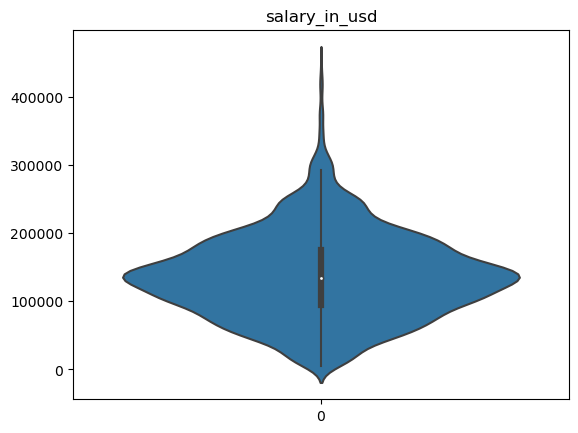

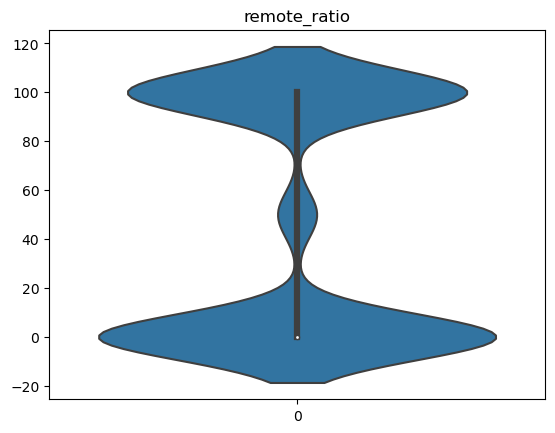

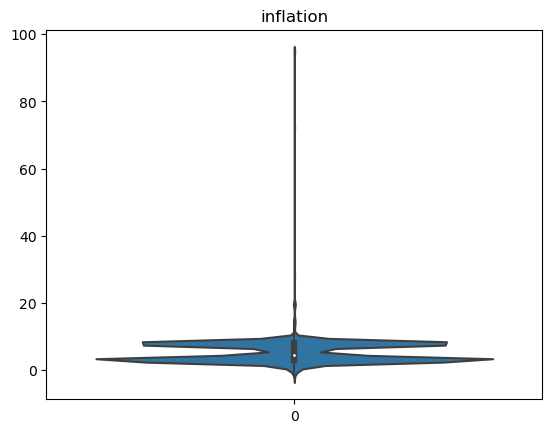

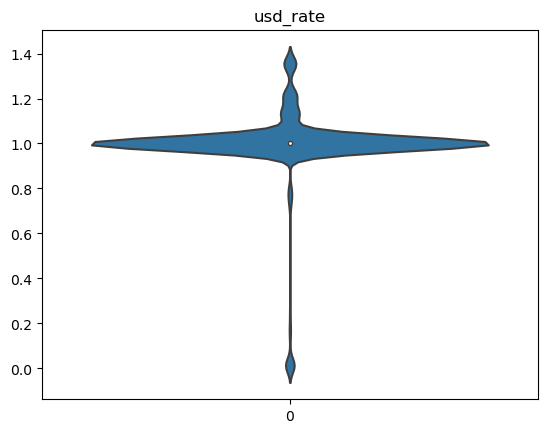

In [41]:
for col in df_sal_to_model.select_dtypes(exclude='object').columns:
    sns.violinplot(df_sal_to_model[col])
    plt.title(col)
    plt.show()

### Df split to train and test

In [105]:
X, y = df_sal_to_model.drop('salary_in_usd', axis=1), df_sal_to_model['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=RAND_ST)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3004, 11) (751, 11) (3004,) (751,)


## Make pipeline

In [108]:
num_cols = X_train.select_dtypes(exclude='object').columns
cat_cols = X_train.select_dtypes(include='object').columns

num_transformer = skl_pipeline(steps=[
    #num_transform
    ('power',
     PowerTransformer()
    )
    ])

cat_transformer = skl_pipeline(steps=[
    ('ohe',
     OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)) # drop = 'if_binary' if cat will not change + ordinalecn
    ])

cat_transformer_oe = skl_pipeline(steps=[
    ('oe',
     OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) # drop = 'if_binary' if cat will not change
    ])


# make preprocessor
preprocessor = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('num_transformer', num_transformer, num_cols),
        ('cat_transformer_oe', cat_transformer_oe, cat_cols)
        ]
    )

# make pipe model

pipe_xgbr = skl_pipeline(steps=[
    ('preprocessor', preprocessor),

    ('model_xgbr', xgb.XGBRegressor(random_state=RAND_ST)) # +cat cols in xgb 2-nd model
])

pipe_xgbr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  Index(['remote_ratio', 'inflation', 'usd_rate'], dtype='object')),
                                                 ('cat_transformer_oe',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index(['experience...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=345, ...))])

In [109]:
# preprocessor check
preprocessor.fit(X_train, y_train)
preprocessor.transform(X_test)

,num_transformer__remote_ratio,num_transformer__inflation,num_transformer__usd_rate,cat_transformer_oe__experience_level,cat_transformer_oe__employment_type,cat_transformer_oe__job_title,cat_transformer_oe__salary_currency,cat_transformer_oe__employee_residence,cat_transformer_oe__company_location_x,cat_transformer_oe__company_size,cat_transformer_oe__company_location_y
2754,-0.982,0.930,-0.134,3.000,2.000,23.000,19.000,71.000,66.000,1.000,66.000
1898,-0.982,0.930,-0.134,2.000,2.000,30.000,19.000,71.000,66.000,1.000,66.000
3415,1.042,0.930,-0.134,3.000,2.000,44.000,19.000,71.000,66.000,1.000,66.000
62,1.042,-0.781,-0.134,3.000,2.000,44.000,19.000,71.000,66.000,1.000,66.000
728,-0.982,-0.781,-0.134,2.000,2.000,63.000,19.000,71.000,66.000,1.000,66.000
...,...,...,...,...,...,...,...,...,...,...,...
3277,1.042,0.930,-0.134,3.000,2.000,23.000,19.000,71.000,66.000,1.000,66.000
3452,1.042,0.606,-1.604,3.000,2.000,65.000,2.000,11.000,12.000,1.000,12.000
2172,0.759,0.606,-1.604,2.000,2.000,70.000,2.000,11.000,12.000,0.000,12.000
3257,-0.982,0.930,-0.134,3.000,2.000,23.000,19.000,71.000,66.000,1.000,66.000


## Hyperparameters optimize

In [111]:
def hyper_opt(trial):
    '''add hyperparameters from xgb model'''
    num_cols = X_train.select_dtypes(exclude='object').columns
    cat_cols = X_train.select_dtypes(include='object').columns

    hyperparameters = {
        'model_xgbr__learning_rate': trial.suggest_float('model_xgbr__learning_rate', 0.01, 0.6), # alias for eta
        'model_xgbr__min_split_loss': trial.suggest_int('model_xgbr__min_split_loss', 0, 150000),    # alias for gamma
        'model_xgbr__max_depth': trial.suggest_int('model_xgbr__max_depth', 1, 100),
        'model_xgbr__min_child_weight': trial.suggest_int('model_xgbr__min_child_weight', 1, 20),
        'model_xgbr__subsample': trial.suggest_float('model_xgbr__subsample', 0.5, 1),
        'model_xgbr__colsample_bytree': trial.suggest_float('model_xgbr__colsample_bytree', 0.5, 1),
        'model_xgbr__reg_lambda': trial.suggest_int('model_xgbr__reg_lambda', 0, 200),
        'model_xgbr__reg_alpha': trial.suggest_int('model_xgbr__reg_alpha', 0, 100),    #???
        'model_xgbr__n_estimators': 100,
        'model_xgbr__max_leaves': trial.suggest_int('model_xgbr__max_leaves', 2, 100),
        'model_xgbr__categorical_feature': list(cat_cols)  # Specify categorical features
    }



    num_transformer = skl_pipeline(steps=[
        #num_transform
        ('power',
        PowerTransformer()
        )
        ])

    cat_transformer = skl_pipeline(steps=[
        ('ohe',
        OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)) # drop = 'if_binary' if cat will not change
        ])

    cat_transformer_oe = skl_pipeline(steps=[
    ('oe',
     OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) # drop = 'if_binary' if cat will not change
    ])

    
    # make preprocessor
    preprocessor = ColumnTransformer(
        remainder='passthrough',
        transformers=[
            ('num_transformer', num_transformer, num_cols),
            ('cat_transformer_oe', cat_transformer_oe, cat_cols)
            ]
        )

    # make pipe model

    pipe_xgbr = skl_pipeline(steps=[
        ('preprocessor', preprocessor),

        ('model_xgbr', xgb.XGBRegressor(random_state=RAND_ST))
    ])

    pipe_xgbr.set_params(**hyperparameters) #разименование
    
    return cross_val_score(pipe_xgbr, X_train, y_train, scoring='neg_mean_squared_error').mean()

### Optuna apply

In [112]:
try:
    study = optuna.create_study(direction='maximize')
    study.optimize(hyper_opt, n_trials=100)
except KeyboardInterrupt:
    print("Optimization interrupted by user.")


[I 2024-01-08 19:52:28,741] A new study created in memory with name: no-name-a902e159-62a3-4c00-8736-3b3c499e0fe5
[I 2024-01-08 19:52:29,710] Trial 0 finished with value: -2306908366.0227776 and parameters: {'model_xgbr__learning_rate': 0.44221130189476876, 'model_xgbr__min_split_loss': 61201, 'model_xgbr__max_depth': 24, 'model_xgbr__min_child_weight': 20, 'model_xgbr__subsample': 0.9543582884572657, 'model_xgbr__colsample_bytree': 0.5605747683046962, 'model_xgbr__reg_lambda': 119, 'model_xgbr__reg_alpha': 97, 'model_xgbr__max_leaves': 32}. Best is trial 0 with value: -2306908366.0227776.
[I 2024-01-08 19:52:30,688] Trial 1 finished with value: -2316211375.5811067 and parameters: {'model_xgbr__learning_rate': 0.18553974398823306, 'model_xgbr__min_split_loss': 2325, 'model_xgbr__max_depth': 73, 'model_xgbr__min_child_weight': 7, 'model_xgbr__subsample': 0.8955695248595005, 'model_xgbr__colsample_bytree': 0.8481661700849461, 'model_xgbr__reg_lambda': 76, 'model_xgbr__reg_alpha': 6, 'mod

{'model_xgbr__learning_rate': 0.08371443454597569, 'model_xgbr__min_split_loss': 44062, 'model_xgbr__max_depth': 10, 'model_xgbr__min_child_weight': 10, 'model_xgbr__subsample': 0.6652833901058312, 'model_xgbr__colsample_bytree': 0.5743250464302565, 'model_xgbr__reg_lambda': 31, 'model_xgbr__reg_alpha': 36, 'model_xgbr__max_leaves': 94}


-2265160735.963102

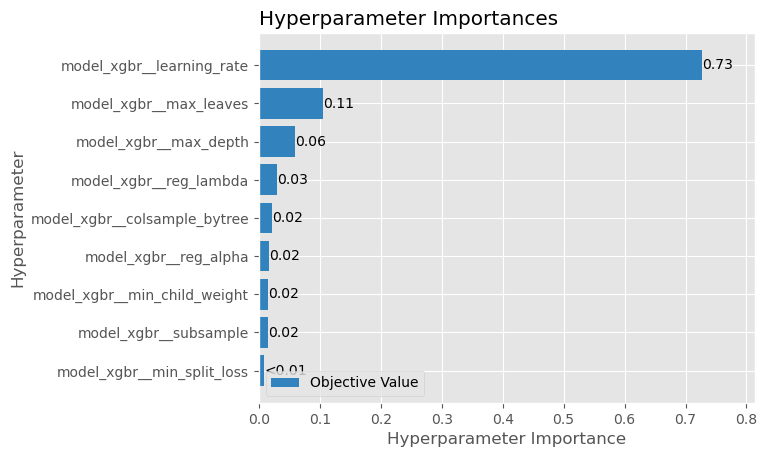

In [113]:
print(study.best_params)

plot_param_importances(study);
study.best_value

## Fit xgbr model with the best hyperpams

In [114]:
# Fit the XGBoost model with the best hyperparameters
pipe_xgbr.set_params(**study.best_params)
pipe_xgbr.fit(X_train, y_train)

# Generate predictions on the training set
train_predictions = pipe_xgbr.predict(X_train)

# Calculate descriptive statistics of the predicted values
pd.DataFrame(train_predictions).describe()

# Calculate mean squared error and mean absolute error on the training set
mse_train = mean_squared_error(y_train, train_predictions)
mae_train = mean_absolute_error(y_train, train_predictions)

print(f'mse={mse_train / y_train.shape[0]}')  # Mean squared error normalized by the number of samples
print(f'mae={mae_train / y_train.shape[0]}')  # Mean absolute error normalized by the number of samples


mse=671999.5165547961
mae=11.154806307599598


## Model save in mlflow

In [82]:
mlflow.set_experiment('salary_prediction')

2024/01/07 19:18:09 INFO mlflow.tracking.fluent: Experiment with name 'salary_prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///home/pmu/zet/obs-h/Projects_od/ds_salary/mlruns/883913715377222921', creation_time=1704644289517, experiment_id='883913715377222921', last_update_time=1704644289517, lifecycle_stage='active', name='salary_prediction', tags={}>

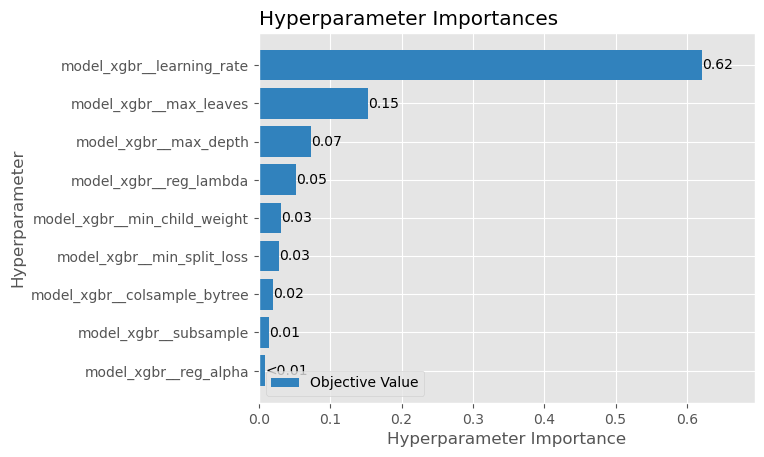

In [115]:
hyperpams = optuna.visualization.matplotlib.plot_param_importances(study)
plt.savefig('hyperpams_oe.png')

In [116]:
with mlflow.start_run(run_name='model_oe'):
    # Log the hyperparameters
    mlflow.log_params(study.best_params)
    
    # Fit the XGBoost model with the best hyperparameters
    pipe_xgbr.set_params(**study.best_params)
    pipe_xgbr.fit(X_train, y_train)
    predict_test = pipe_xgbr.predict(X_test)
    metrics = {
        'mse_cv': study.best_value / len(y_train) * 0.8, # if cv = 5
        'mae': mean_absolute_error(y_test, predict_test),
        'median_abs_error': abs(y_test - predict_test).median(),
        'median_error': (abs(y_test - predict_test) / y_test).median(),
        'mean_error': (abs(y_test - predict_test) / y_test).mean()
    } 
    
    mlflow.log_artifact('hyperpams_oe.png') 
    mlflow.log_metrics(metrics)
    mlflow.sklearn.log_model(pipe_xgbr, 'model_oe')

## Models comparison

In [42]:
# Set path to logged models
logged_model_ohe = 'runs:/779e838e73a64b47a613a9dc81a585f2/model_ohe'
logged_model_oe = 'runs:/b58bb266eb3644fdbe04586f7c250ce2/model_oe'

# Load the logged models
loaded_model_ohe = mlflow.sklearn.load_model(logged_model_ohe)
loaded_model_oe = mlflow.sklearn.load_model(logged_model_oe)

## Best model save

In [43]:
# test model ohe save

# joblib.dump(loaded_model_ohe, 'test_model_ohe.joblib')

['test_model_ohe.joblib']